In [1]:
# basic essential libraries
import matplotlib.pyplot as plt
import numpy as np
import os

# libraries for displaying images and videos
import cv2
import copy
from IPython.display import HTML
import io
import base64

# pose estimation library
from pytorch_openpose.src import model
from pytorch_openpose.src import util
from pytorch_openpose.src.body import Body

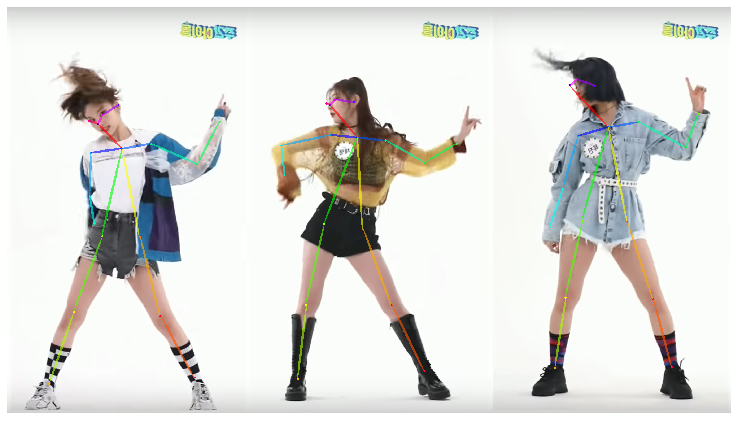

In [2]:
# Import model
body_estimation = Body('pytorch_openpose/model/body_pose_model.pth')

# Import image
test_image = 'images/vid1.png'
#test_image = 'images/frame12.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order

# Body Estimation
candidate, subset = body_estimation(oriImg) # add %timeit at the start to time
# Execution Time: 8.89 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# Draw results on another image
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)

fig, axes = plt.subplots(1,1, figsize=(15,7.5))
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [3]:
print("Candidate:")
print(candidate.shape)
print("Contains a list of key points - 54 Keypoints in this image")
print("[x-coord, y-coord, score, id]")
print("-"*50)
print(candidate)

Candidate:
(54, 4)
Contains a list of key points - 54 Keypoints in this image
[x-coord, y-coord, score, id]
--------------------------------------------------
[[2.12200000e+03 2.95000000e+02 7.98454046e-01 0.00000000e+00]
 [1.21800000e+03 3.68000000e+02 9.79671896e-01 1.00000000e+00]
 [3.44000000e+02 4.40000000e+02 9.28059101e-01 2.00000000e+00]
 [2.26600000e+03 4.53000000e+02 8.96453917e-01 3.00000000e+00]
 [1.31800000e+03 4.91000000e+02 9.18040991e-01 4.00000000e+00]
 [4.31000000e+02 5.33000000e+02 9.39496160e-01 5.00000000e+00]
 [1.21700000e+03 4.82000000e+02 9.05073643e-01 6.00000000e+00]
 [2.15200000e+03 4.86000000e+02 8.96852791e-01 7.00000000e+00]
 [3.15000000e+02 5.50000000e+02 9.18559551e-01 8.00000000e+00]
 [1.03400000e+03 5.22000000e+02 9.10059631e-01 9.00000000e+00]
 [2.09600000e+03 6.84000000e+02 9.56604958e-01 1.00000000e+01]
 [3.11000000e+02 7.13000000e+02 8.30149293e-01 1.10000000e+01]
 [1.04600000e+03 6.32000000e+02 8.86416376e-01 1.20000000e+01]
 [3.29000000e+02 8.160

In [4]:
print("Subset: ")
print(subset.shape)
print("Groups keypoints into people (18 points max/person), based on the Keypoint ID's")
print("Contains -1 when a specific keypoint is occluded/not found")
print("Last two outputs: Total Score, Total Parts Detected")
print("-"*50)
print(subset)

Subset: 
(3, 20)
Groups keypoints into people (18 points max/person), based on the Keypoint ID's
Contains -1 when a specific keypoint is occluded/not found
Last two outputs: Total Score, Total Parts Detected
--------------------------------------------------
[[ 1.          4.          6.          9.         12.         16.
  19.         23.         26.         29.         32.         37.
  40.         43.         46.         49.         -1.         52.
  30.49766668 17.        ]
 [ 2.          5.          8.         11.         13.         17.
  20.         22.         27.         30.         33.         38.
  41.         44.         47.         50.         -1.         53.
  30.97781693 17.        ]
 [ 0.          3.          7.         10.         14.         15.
  18.         21.         25.         28.         31.         36.
  39.         42.         -1.         48.         -1.         51.
  28.65876838 16.        ]]


In [5]:
feature_array = []
for person in subset:
    print(person)
    
    for point_idx in range(len(person)):
        print("point_idx: " + str(person[point_idx]))
        
        if point_idx < 18:
            candidate_idx = int(person[point_idx])
            print("candidate point #" + str(candidate_idx))
            
            point_coord = np.ones((3,))
            
            if candidate_idx < 0:
                print("Occluded")
                point_coord = point_coord * -1
            else:
                point_coord = candidate[candidate_idx,:3]
                #print(point_coord)
                
            print(point_coord)
            feature_array = np.hstack((feature_array, point_coord))
        else:
            # just add to the thing
            print(person[point_idx])
            feature_array = np.hstack((feature_array, person[point_idx]))
            
        print(feature_array.shape)
        
        print("*"*50)
    
    print("-" * 50)
    #break

print(feature_array.shape)

[ 1.          4.          6.          9.         12.         16.
 19.         23.         26.         29.         32.         37.
 40.         43.         46.         49.         -1.         52.
 30.49766668 17.        ]
point_idx: 1.0
candidate point #1
[1.21800000e+03 3.68000000e+02 9.79671896e-01]
(3,)
**************************************************
point_idx: 4.0
candidate point #4
[1.31800000e+03 4.91000000e+02 9.18040991e-01]
(6,)
**************************************************
point_idx: 6.0
candidate point #6
[1.21700000e+03 4.82000000e+02 9.05073643e-01]
(9,)
**************************************************
point_idx: 9.0
candidate point #9
[1.03400000e+03 5.22000000e+02 9.10059631e-01]
(12,)
**************************************************
point_idx: 12.0
candidate point #12
[1.04600000e+03 6.32000000e+02 8.86416376e-01]
(15,)
**************************************************
point_idx: 16.0
candidate point #16
[1.42700000e+03 5.03000000e+02 8.91708553e-01]
(18,)
*

[2.149000e+03 2.730000e+02 7.688241e-01]
(160,)
**************************************************
point_idx: -1.0
candidate point #-1
Occluded
[-1. -1. -1.]
(163,)
**************************************************
point_idx: 51.0
candidate point #51
[2.21700000e+03 2.96000000e+02 8.07124496e-01]
(166,)
**************************************************
point_idx: 28.658768377391898
28.658768377391898
(167,)
**************************************************
point_idx: 16.0
16.0
(168,)
**************************************************
--------------------------------------------------
(168,)
